In [26]:
import os
import subprocess

import numpy as np
from pathlib import Path
import lossmaps as lm
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pickle
import xtrack as xt
import xpart as xp
import matplotlib.colors as colors

In [2]:
path_dir = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/no_blowup_imperfections/run_04.03.2025/rect_xy')

In [3]:
def get_lossmap_paths(path, file_name_base):

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.json', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
        else:
            print(f'Job {i} failed')
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

# Combining dictionaries

In [4]:
def get_particle_dico_paths(path, file_name_base):

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.pkl', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
        else:
            print(f'Job {i} failed')
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

In [5]:
part_paths = {
    'ripple_errors' : get_particle_dico_paths(str(path_dir), 'particles_ripple_errors.pkl'),
    'ripple' : get_particle_dico_paths(str(path_dir), 'particles_ripple.pkl'),
    'errors' : get_particle_dico_paths(str(path_dir), 'particles_errors.pkl'),
    'linear' : get_particle_dico_paths(str(path_dir), 'particles_linear.pkl'),
} # For some reason the function does not work, but copying the function in a cell does...

Job 0 failed
Job 1 failed
Job 2 failed
Job 3 failed
Job 4 failed
Job 5 failed
Job 6 failed
Job 7 failed
Job 8 failed
Job 9 failed
Job 10 failed
Job 11 failed
Job 12 failed
Job 13 failed
Job 14 failed
Job 15 failed
Job 16 failed
Job 17 failed
Job 18 failed
Job 19 failed
Job 20 failed
Job 21 failed
Job 22 failed
Job 23 failed
Job 24 failed
Job 25 failed
Job 26 failed
Job 27 failed
Job 28 failed
Job 29 failed
Job 30 failed
Job 31 failed
Job 32 failed
Job 33 failed
Job 34 failed
Job 35 failed
Job 36 failed
Job 37 failed
Job 38 failed
Job 39 failed
Job 40 failed
Job 41 failed
Job 42 failed
Job 43 failed
Job 44 failed
Job 45 failed
Job 46 failed
Job 47 failed
Job 48 failed
Job 49 failed
Job 50 failed
Job 51 failed
Job 52 failed
Job 53 failed
Job 54 failed
Job 55 failed
Job 56 failed
Job 57 failed
Job 58 failed
Job 59 failed
Job 60 failed
Job 61 failed
Job 62 failed
Job 63 failed
Job 64 failed
Job 65 failed
Job 66 failed
Job 67 failed
Job 68 failed
Job 69 failed
Job 70 failed
Job 71 failed
Jo

KeyboardInterrupt: 

In [60]:
path = '/eos/user/l/lpauwels/ht_condor_sps_tracking_results/no_blowup_imperfections/run_04.03.2025/rect_xy'
part_paths = {}
for file_name_base in ['particles_ripple_errors', 'particles_ripple', 'particles_errors', 'particles_linear']:
    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))

    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.pkl', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
        else:
            print(f'Job {i} failed')

    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
    
    part_paths[file_name_base] = job_files_list

1556 out of a total of 1556 succeeded
1556 out of a total of 1556 succeeded
1556 out of a total of 1556 succeeded
1556 out of a total of 1556 succeeded


In [62]:
merged_data = {}

for sim_type in ['particles_ripple_errors', 'particles_ripple', 'particles_errors', 'particles_linear']:
    merged_data = {}
    for i, file_path in enumerate(part_paths[sim_type]):
        with open(file_path, "rb") as f:
            data = pickle.load(f)  # Load dictionary from pickle file

        for key, value in data.items():
            if key == 'particle_id':
                if key not in merged_data:
                    merged_data[key] = np.array(value) + i*10
                else:
                    merged_data[key] = np.concatenate((merged_data[key], np.array(value) + i*10))
            else:
                if isinstance(value, (np.ndarray, list)):  # If it's an array, we concatenate
                    if key in merged_data:
                        merged_data[key] = np.concatenate((merged_data[key], np.array(value)))
                    else:
                        merged_data[key] = np.array(value)
                
                elif isinstance(value, np.float64) or isinstance(value, int) or isinstance(value, np.int64):  # Scalar values
                    if key not in merged_data:  # Keep only the first encountered value
                        merged_data[key] = value
                
                else:
                    print(f"Skipping key: {key}, unknown type: {type(value)}")  # Debugging for unknown types

    # Save the merged dictionary back to a new pickle file
    with open(f"{sim_type}.pkl", "wb") as f:
        pickle.dump(merged_data, f)

# Analysing data

In [3]:
particles = {}
for sim_type in ['linear', 'errors', 'ripple', 'ripple_errors']:
    with open(f'lossmaps_diffusion/particles_dir/rect_xy/particles_{sim_type}.pkl', 'rb') as f:
        particles[sim_type] = pickle.load(f)

In [4]:
def generate_longitudinal_slice(line, num_particles, cut, sigma_z, upper_cut=None):
    zeta = []
    delta = []
    num = 0
    step = int(1.e7)
    while True:
        this_zeta, this_delta = xp.generate_longitudinal_coordinates(num_particles=step,
                                    distribution='gaussian', sigma_z=sigma_z, line=line)
        amp = np.sqrt((this_zeta/this_zeta.std())**2 + (this_delta/this_delta.std())**2)
        mask = amp >= cut
        if upper_cut is not None:
            mask = mask & (amp <= upper_cut)
        zeta = [*zeta, *this_zeta[mask]]
        delta = [*delta, *this_delta[mask]]
        num += len(np.where(mask)[0])
        if num >= num_particles:
            zeta = zeta[:num_particles]
            delta = delta[:num_particles]
            break
    return zeta, delta

In [5]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap2.json')
line.build_tracker()
tw = line.twiss()
line.collimators.assign_optics(twiss=tw, nemitt_x=3.5e-6, nemitt_y=3.5e-6)
line.optimize_for_tracking()

#Make particles
zeta, delta = generate_longitudinal_slice(line, 15560, cut=0, sigma_z=0.224)

x_int = np.linspace(-12.7, 12.7, round(12.7*2/0.1)+1)
x_ext = np.linspace(-14.7, 14.7, round(14.7*2/0.1)+1)

y_int = np.linspace(-4.6683, 4.6683, round(4.6683*2/0.1)+1)
y_ext = np.linspace(-6.6683, 6.6683, round(6.6683*2/0.1)+1)

X, Y = np.meshgrid(x_ext, y_ext, indexing='xy')

x_flat = X.ravel()
y_flat = Y.ravel()

# Filter out points that fall inside the inner rectangle
mask = ~((x_flat >= x_int.min()) & (x_flat <= x_int.max()) &
         (y_flat >= y_int.min()) & (y_flat <= y_int.max()))

# Apply mask
x_hollow = x_flat[mask]
y_hollow = y_flat[mask]

part = line.build_particles(x_norm=x_hollow, px_norm=np.zeros_like(x_hollow), y_norm=y_hollow, py_norm=np.zeros_like(y_hollow), nemitt_x=3.5e-6, nemitt_y=3.5e-6, zeta=zeta, delta=delta)

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           
Disable xdeps expressions
Replance slices with equivalent elements
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data
*** Maximum RMS bunch length 0.23305719224813928m.
... distance to target bunch length: -2.2400e-01
... distance to target bunch length: 4.2397e-03
... distance to target bunch length: 4.0509e-03
... distance to target bunch length: -5.4164e-03
... distance to target bunch length: 1.6934e-03
... distance to target bunch length: -3.8711e-04
... distance to target bunch length: 6.2540e-05
... distance to target bunch length: 1.9666e-06
... distance to target bunch length: -3.5749e-10
... distance to target bunch length: 9.4807e-08
--> Bunch length: 0.22399999964250905
--> Emittance: 0.34322710188738204


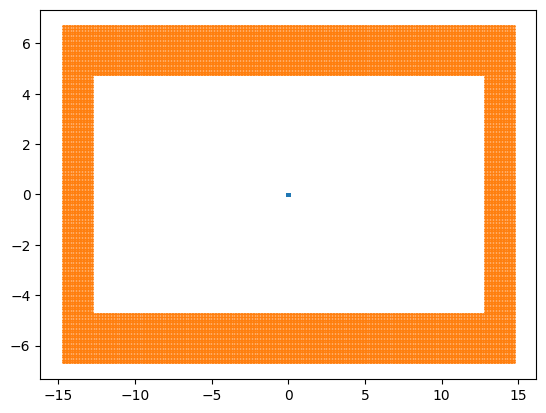

In [6]:
plt.close()
plt.scatter(part.x, part.y, s=1)
plt.scatter(x_hollow, y_hollow, s=1)

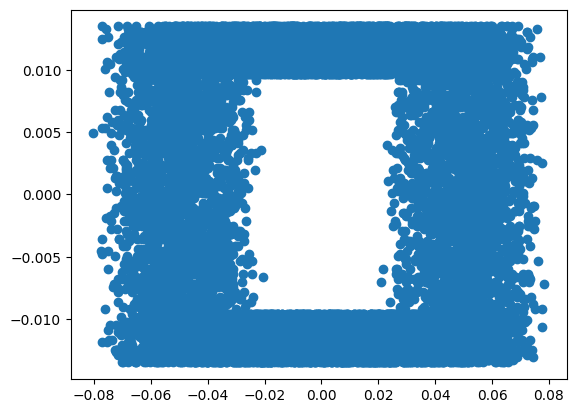

In [6]:
plt.close()
plt.scatter(part.x, part.y)

In [ ]:
death_turns = {}
particle_states = {}
for sim_type in ['ripple_errors', 'ripple', 'errors', 'linear']:
    idxs, turns, state = zip(*sorted(zip(particles[sim_type]['particle_id'], particles[sim_type]['at_turn'], particles[sim_type]['state'])))

    death_turns[sim_type] = np.array(turns)
    particle_states[sim_type] = np.array(state)

# Initial particle distribution in x-y space

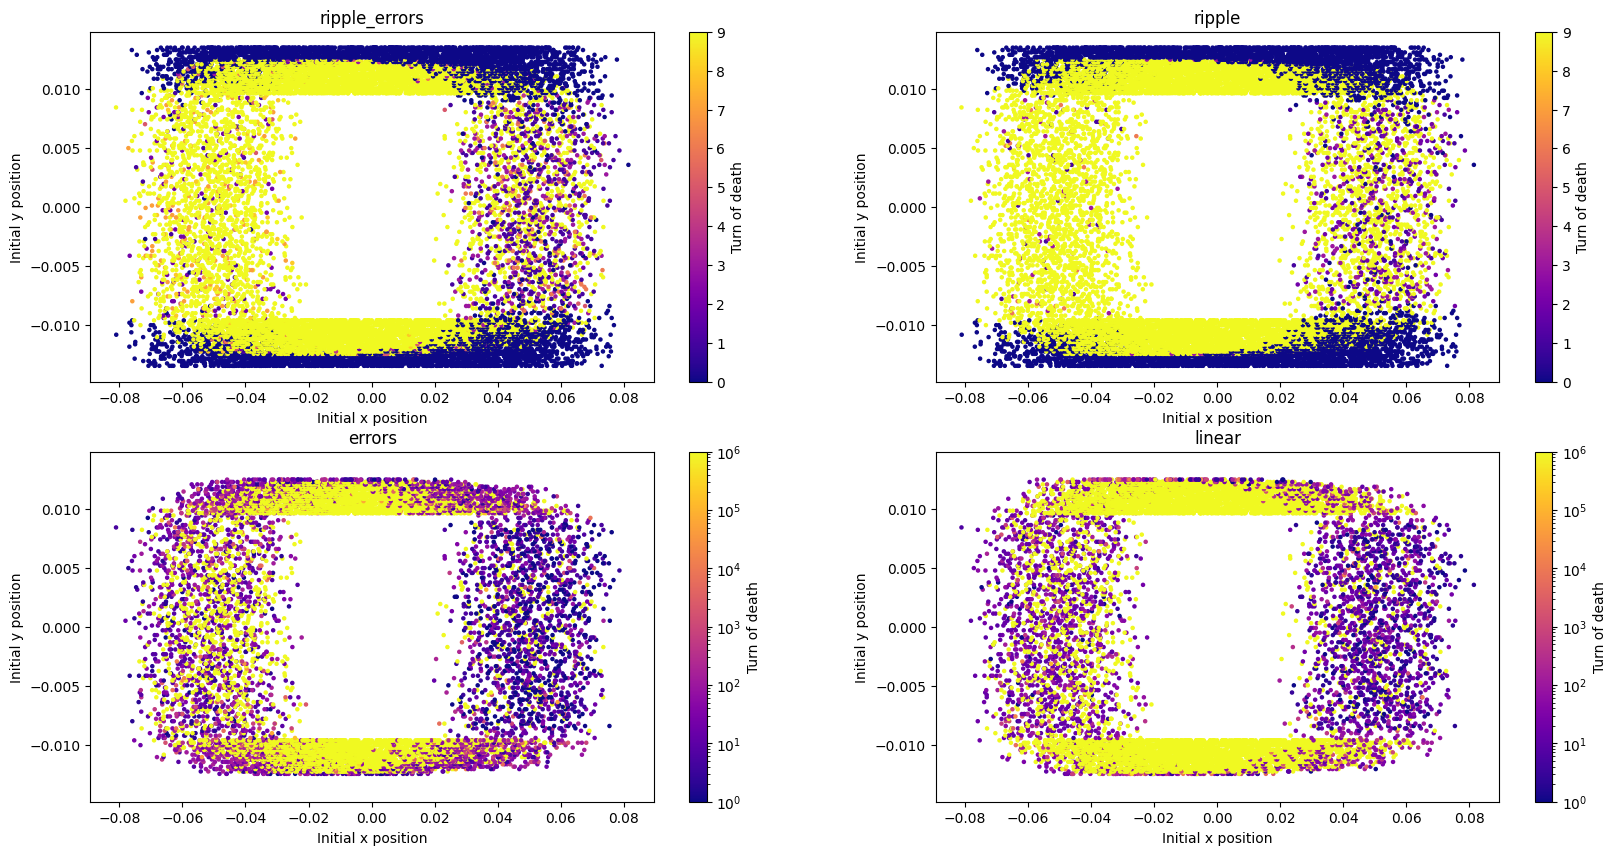

In [33]:
mapping_sim_type = {
    (0,0) : 'ripple_errors',
    (0,1) : 'ripple',
    (1,0) : 'errors',
    (1,1) : 'linear'
}
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
    for j in range(2):
        if i ==0:
            sc = ax[i,j].scatter(part.x, part.y, c=death_turns[mapping_sim_type[(i,j)]], cmap='plasma', marker='o', s=5)
        if i == 1:
            s = np.log(np.array(death_turns[mapping_sim_type[(i,j)]])+1)*20
            sc = ax[i,j].scatter(part.x, part.y, c=death_turns[mapping_sim_type[(i,j)]], cmap='plasma', norm=colors.LogNorm(), marker='o', s=5)
        
        cbar = plt.colorbar(sc)
        cbar.set_label("Turn of death")
        ax[i,j].set_xlabel("Initial x position")
        ax[i,j].set_ylabel("Initial y position")
        ax[i,j].set_title(mapping_sim_type[(i,j)])

# Initial particle distribution in normalised space

In [ ]:
alive = {
    'ripple' : particle_states['ripple'] > 0,
    'linear' : particle_states['linear'] > 0,
    'ripple_errors' : particle_states['ripple_errors'] > 0,
    'errors' : particle_states['errors'] > 0
    }

death_mask = {
    'errors' : particle_states['errors'] <= 0 & (death_turns['errors'] >20),
    'ripple' : particle_states['ripple'] <= 0 & (death_turns['ripple'] >20),
    'linear' : particle_states['linear'] <= 0 & (death_turns['linear'] >20),
    'ripple_errors' : particle_states['ripple_errors'] <= 0 & (death_turns['ripple_errors'] >20)
}

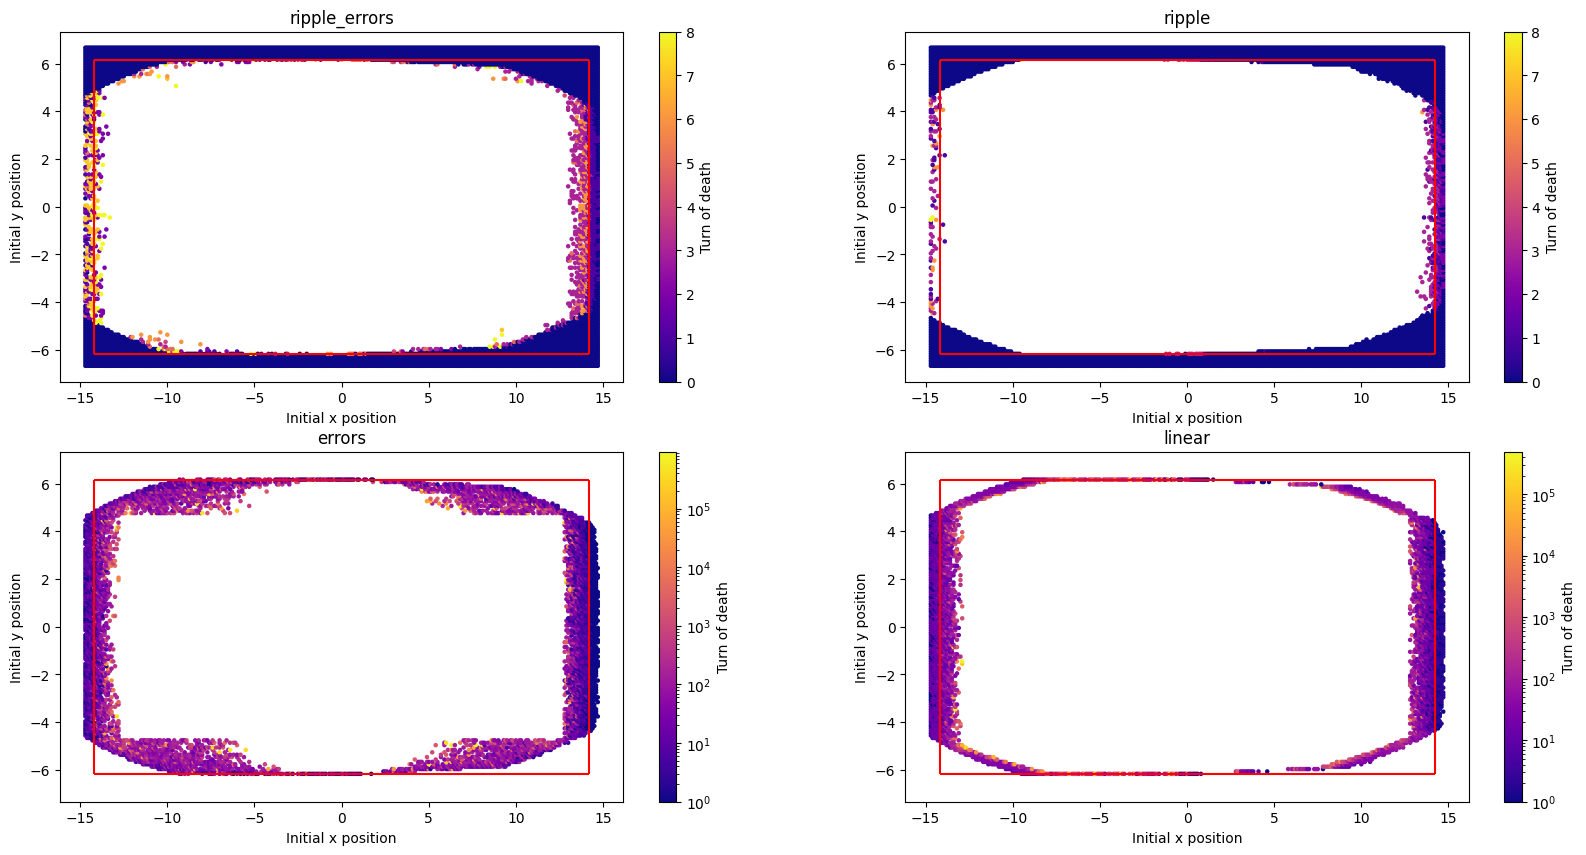

In [82]:
mapping_sim_type = {
    (0,0) : 'ripple_errors',
    (0,1) : 'ripple',
    (1,0) : 'errors',
    (1,1) : 'linear'
}
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
    for j in range(2):
        mask = death_mask[mapping_sim_type[(i,j)]]
        #mask = alive[mapping_sim_type[(i,j)]]
        if i ==0:
            sc = ax[i,j].scatter(x_hollow[mask], y_hollow[mask], c=death_turns[mapping_sim_type[(i,j)]][mask], cmap='plasma', marker='o', s=5)
        if i == 1:
            sc = ax[i,j].scatter(x_hollow[mask], y_hollow[mask], c=death_turns[mapping_sim_type[(i,j)]][mask], cmap='plasma', norm=colors.LogNorm(), marker='o', s=5) #LogNorm screws the edges up
        
        #ax[i,j].scatter(x_hollow[alive[mapping_sim_type[(i,j)]]], y_hollow[alive[mapping_sim_type[(i,j)]]], color='green', s=1)
        
        #Plotting minimum aperture
        ax[i,j].hlines(6.1683, -14.2, 14.2, color='red')
        ax[i,j].hlines(-6.1683, -14.2, 14.2, color='red')
        ax[i,j].vlines(14.2, -6.1683, 6.1683, color='red')
        ax[i,j].vlines(-14.2, -6.1683, 6.1683, color='red')
        
        cbar = plt.colorbar(sc)
        cbar.set_label("Turn of death")
        ax[i,j].set_xlabel("Initial x position")
        ax[i,j].set_ylabel("Initial y position")
        ax[i,j].set_title(mapping_sim_type[(i,j)])

# $\sqrt{\zeta^2 + \delta^2}$ colormap

In [101]:
sqrt_zd = {
    'ripple' : np.sqrt((particles['ripple']['delta']/np.std(particles['ripple']['delta']))**2 + (particles['ripple']['zeta']/np.std(particles['ripple']['zeta']))**2),
    'linear' : np.sqrt((particles['linear']['delta']/np.std(particles['linear']['delta']))**2 + (particles['linear']['zeta']/np.std(particles['linear']['zeta']))**2),
    'ripple_errors' : np.sqrt((particles['ripple_errors']['delta']/np.std(particles['ripple_errors']['delta']))**2 + (particles['ripple_errors']['zeta']/np.std(particles['ripple_errors']['zeta']))**2),
    'errors' : np.sqrt((particles['errors']['delta']/np.std(particles['errors']['delta']))**2 + (particles['errors']['zeta']/np.std(particles['errors']['zeta']))**2)
    }

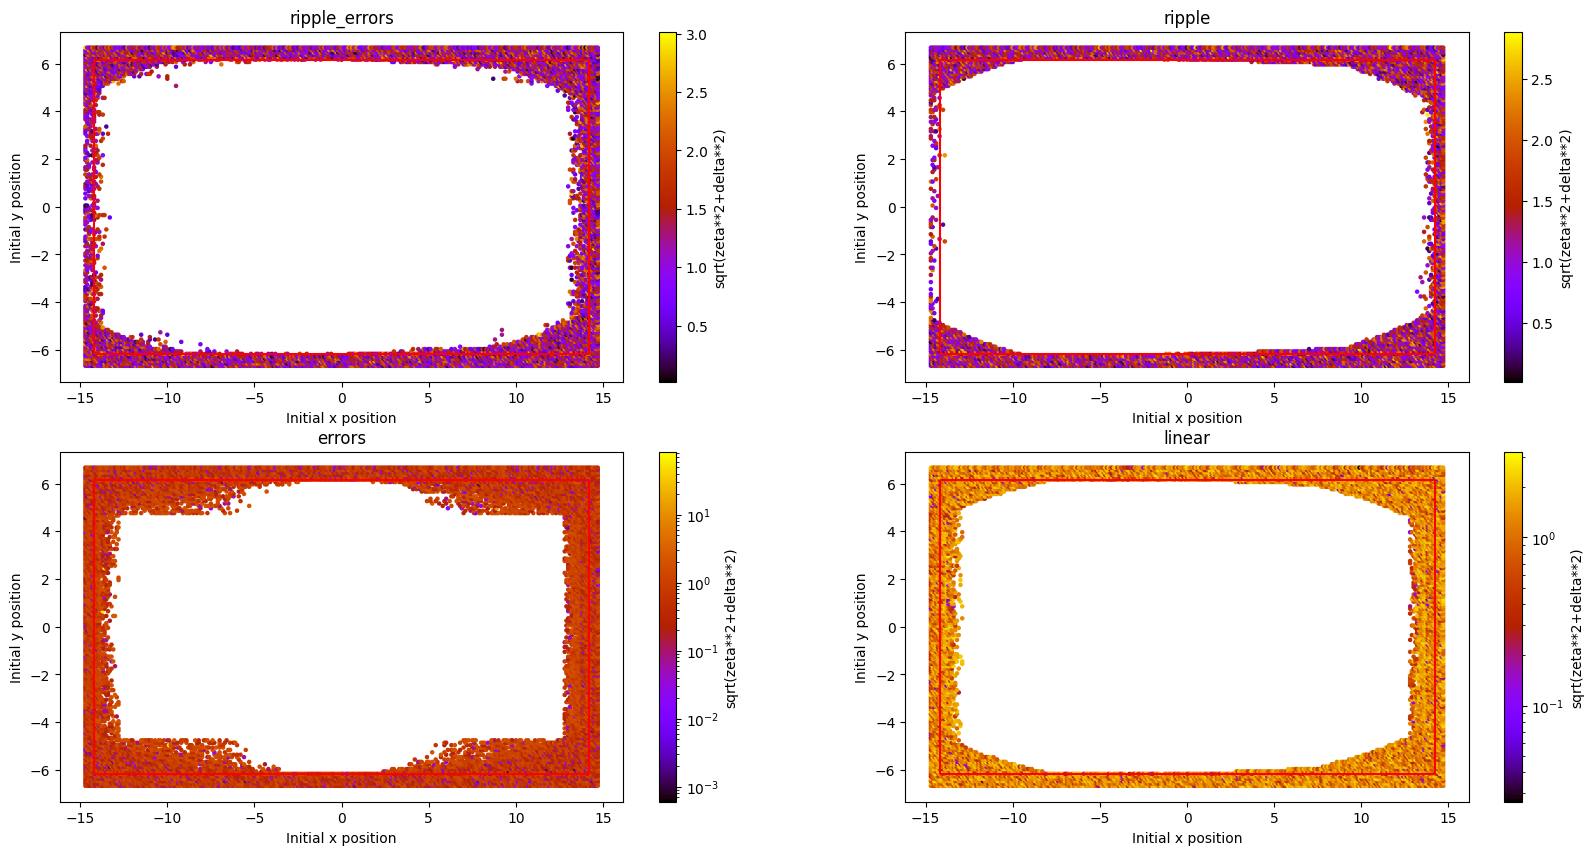

In [102]:
mapping_sim_type = {
    (0,0) : 'ripple_errors',
    (0,1) : 'ripple',
    (1,0) : 'errors',
    (1,1) : 'linear'
}
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
    for j in range(2):
        #mask = death_mask[mapping_sim_type[(i,j)]]
        mask = ~alive[mapping_sim_type[(i,j)]]
        if i ==0:
            sc = ax[i,j].scatter(x_hollow[mask], y_hollow[mask], c=sqrt_zd[mapping_sim_type[(i,j)]][mask], cmap='gnuplot', marker='o', s=5)
        if i == 1:
            sc = ax[i,j].scatter(x_hollow[mask], y_hollow[mask], c=sqrt_zd[mapping_sim_type[(i,j)]][mask], cmap='gnuplot', norm=colors.LogNorm(), marker='o', s=5) #LogNorm screws the edges up
        
        #ax[i,j].scatter(x_hollow[alive[mapping_sim_type[(i,j)]]], y_hollow[alive[mapping_sim_type[(i,j)]]], color='green', s=1)
        
        #Plotting minimum aperture
        ax[i,j].hlines(6.1683, -14.2, 14.2, color='red')
        ax[i,j].hlines(-6.1683, -14.2, 14.2, color='red')
        ax[i,j].vlines(14.2, -6.1683, 6.1683, color='red')
        ax[i,j].vlines(-14.2, -6.1683, 6.1683, color='red')
        
        cbar = plt.colorbar(sc)
        cbar.set_label("sqrt(zeta**2+delta**2)")
        ax[i,j].set_xlabel("Initial x position")
        ax[i,j].set_ylabel("Initial y position")
        ax[i,j].set_title(mapping_sim_type[(i,j)])

In [99]:
print(np.mean(sqrt_zd['errors'][~alive['errors']]), np.std(sqrt_zd['errors'][~alive['errors']]))

3.3530060316906636 179.83244274311804


In [100]:
print(np.mean(sqrt_zd['linear'][~alive['linear']]), np.std(sqrt_zd['linear'][~alive['linear']]))

0.17175943179843298 0.1294572294214234


# Histogram death turns

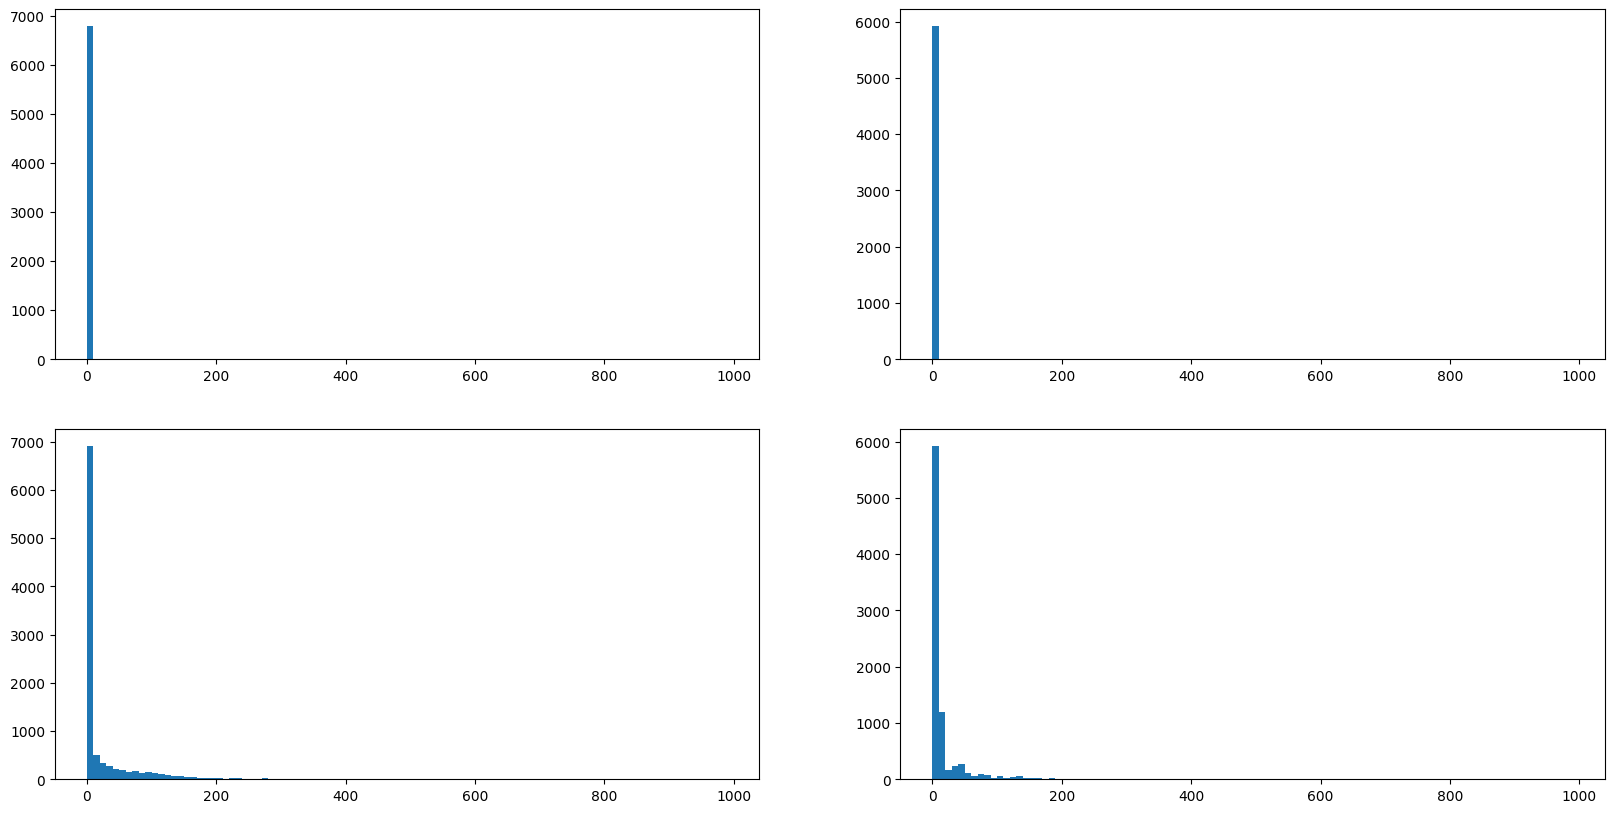

In [96]:
mapping_sim_type = {
    (0,0) : 'ripple_errors',
    (0,1) : 'ripple',
    (1,0) : 'errors',
    (1,1) : 'linear'
}
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
    for j in range(2):
        mask = ~alive[mapping_sim_type[(i,j)]]
        data = np.unique(death_turns[mapping_sim_type[(i,j)]][mask], return_counts=True)
        ax[i,j].hist(death_turns[mapping_sim_type[(i,j)]][mask], bins=range(0, 1000, 10))

# Death and alive particles

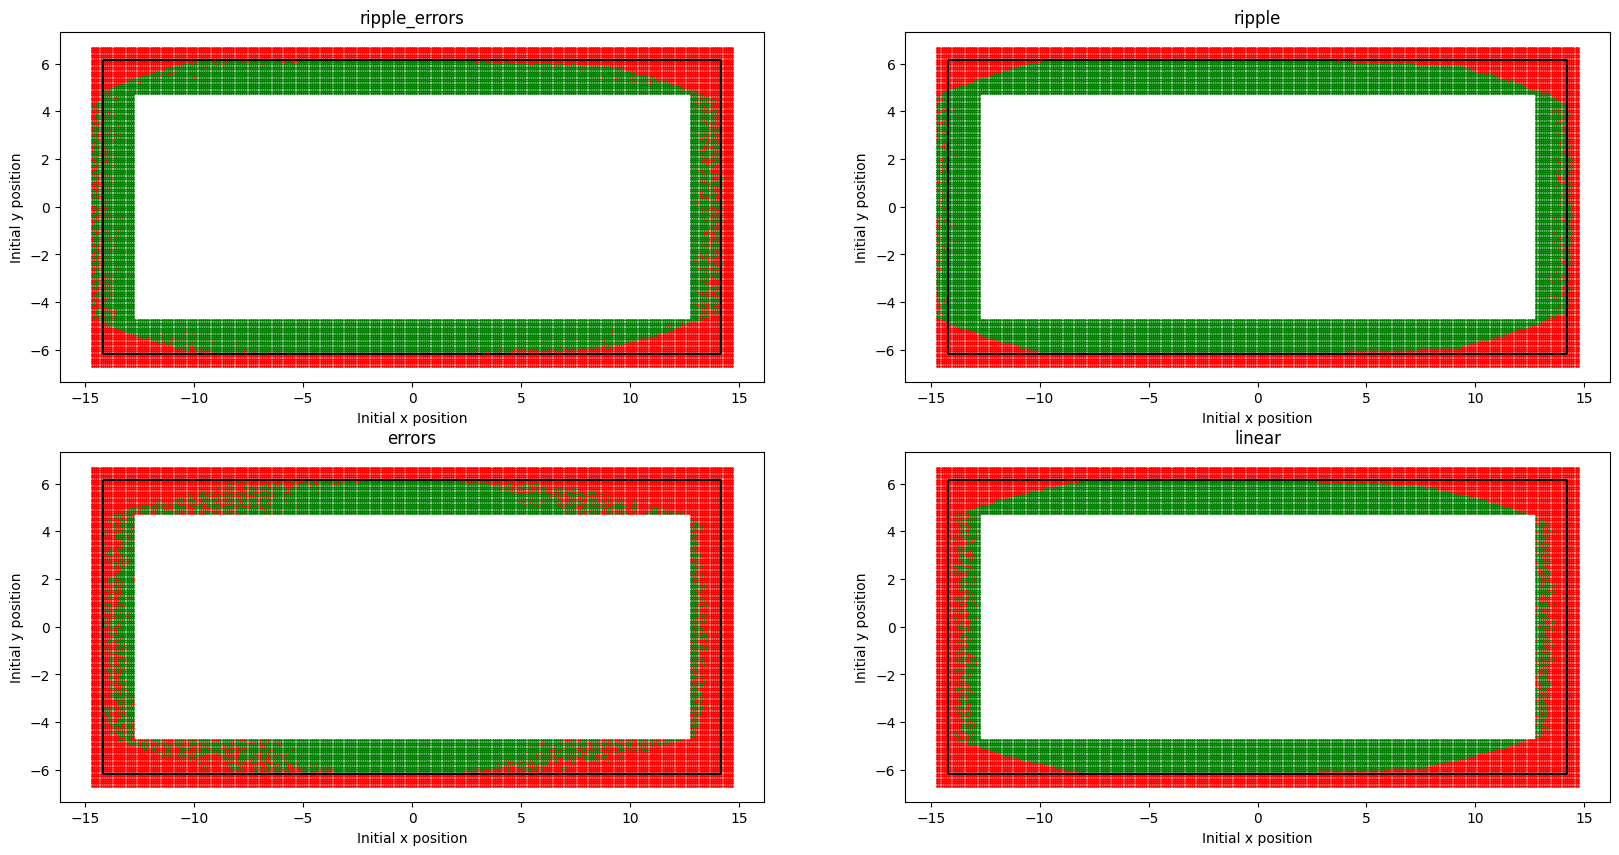

In [103]:
mapping_sim_type = {
    (0,0) : 'ripple_errors',
    (0,1) : 'ripple',
    (1,0) : 'errors',
    (1,1) : 'linear'
}
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(2):
    for j in range(2):
        sim_type = mapping_sim_type[(i,j)]
        ax[i,j].scatter(x_hollow[~alive[sim_type]], y_hollow[~alive[sim_type]], s=1, color='red')
        ax[i,j].scatter(x_hollow[alive[sim_type]], y_hollow[alive[sim_type]], s=1, color='green')
        
        #Plotting minimum aperture
        ax[i,j].hlines(6.1683, -14.2, 14.2, color='black')
        ax[i,j].hlines(-6.1683, -14.2, 14.2, color='black')
        ax[i,j].vlines(14.2, -6.1683, 6.1683, color='black')
        ax[i,j].vlines(-14.2, -6.1683, 6.1683, color='black')
        
        ax[i,j].set_xlabel("Initial x position")
        ax[i,j].set_ylabel("Initial y position")
        ax[i,j].set_title(mapping_sim_type[(i,j)])